# `Extrinsic Calibration` mounted on robot arm

In [1]:
import mujoco_py
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import *
from util import *
from util_fk import *
import cv2

np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Done.
Ready.


##### parsing `UR5e`

In [2]:
env = MuJoCoParserClass(name='UR5e',xml_path='../asset/ur5e/UR5_rg2_gripper.xml')
print ("[%s] parsed."%(env.name))

[UR5e] parsed.


##### Randomly spawn objects

[0/7] obj_name:[obj_cylinder_1]
[1/7] obj_name:[obj_cylinder_2]
[2/7] obj_name:[obj_cylinder_3]
[3/7] obj_name:[obj_cylinder_1_thick]
[4/7] obj_name:[obj_cylinder_2_thick]
[5/7] obj_name:[obj_cylinder_3_thick]
[6/7] obj_name:[obj_box_1]


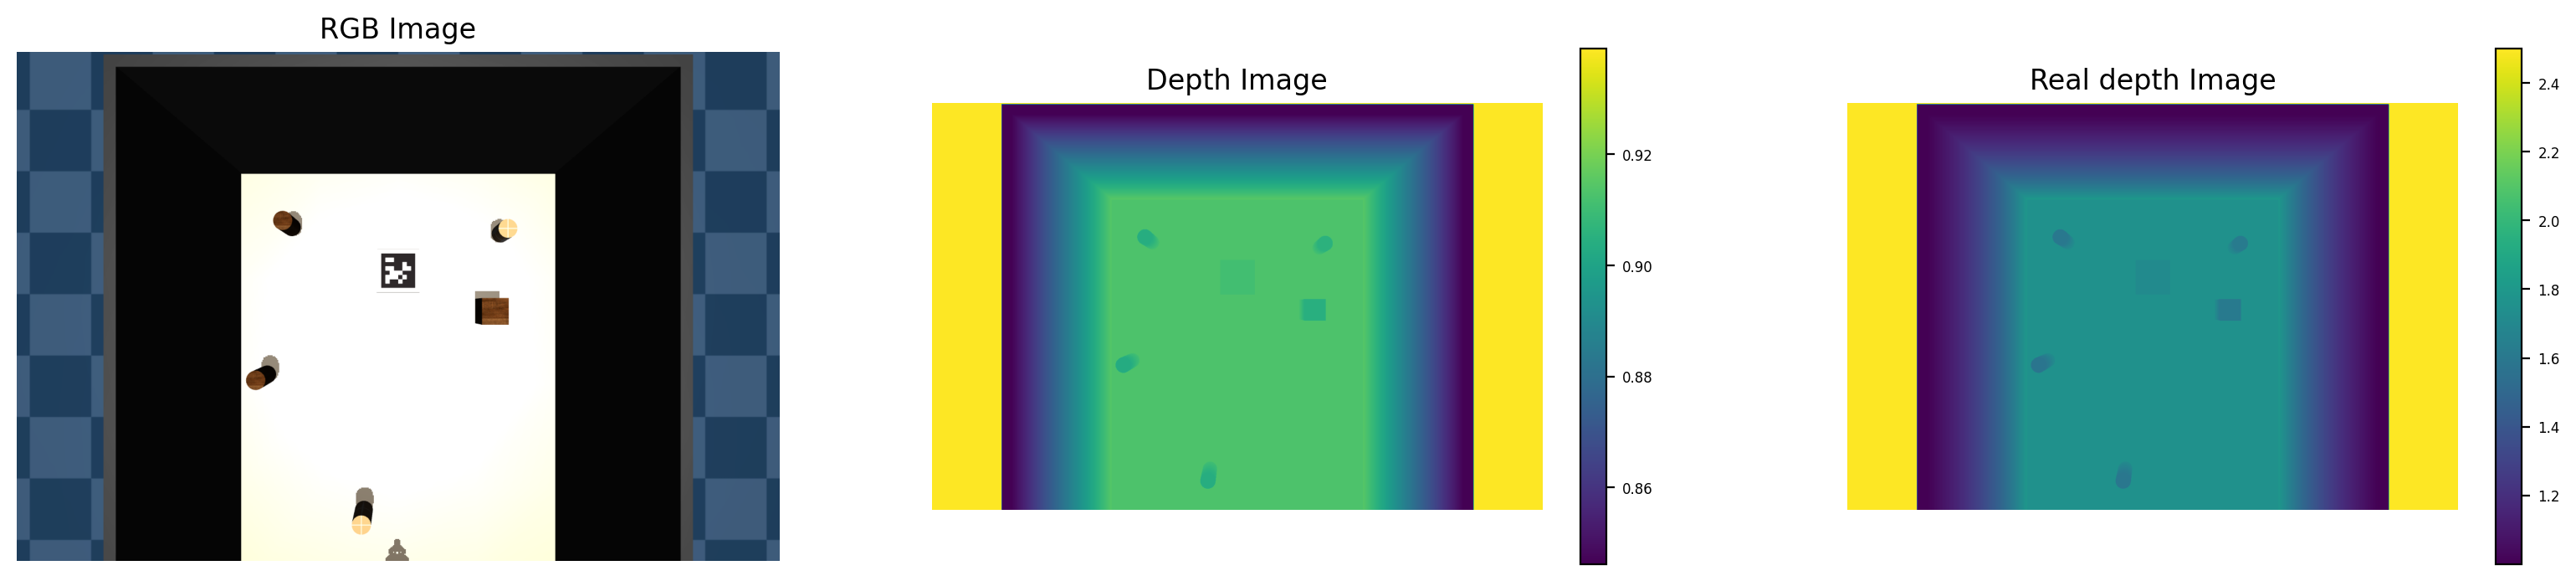

In [3]:
import math

# Get camera information
cam_infos = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 0.0,
                    cam_elevation = -90.0,
                    cam_lookat    = [1.2,0.0,2.5])

# Set AprilTag configurations
april_addr_z = env.sim.model.get_joint_qpos_addr('box_checker_z')
env.sim.data.qpos[april_addr_z] = -math.pi/2

# Check available objects whose names start with 'obj_'
obj_names = get_env_obj_names(env,prefix='obj_') # see objects
for obj_idx,obj_name in enumerate(obj_names):
    print ("[%d/%d] obj_name:[%s]"%(obj_idx,len(obj_names),obj_name))

# Initialize position of objects in a row.
for obj_idx,obj_name in enumerate(obj_names):
    obj_pos   = [1.2,-0.3+0.1*obj_idx,0.8]
    obj_quat  = [0,0,0,1]
    set_env_obj(env=env,obj_name=obj_name,obj_pos=obj_pos,obj_quat=obj_quat,obj_color=None)

random_spawn_objects(env, prefix='obj_')

# Set Joint Configurations
init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]
set_env_joint_configuration(env, init_configurations, prefix='ur_')

# update object locations
env.forward(INCREASE_TICK=False)

width = 1500
height = 1000
ur_joint_idx = np.array([0, 1, 2, 3, 4, 5, 6], dtype=np.int32)

# env.sim.data.qpos[:8] = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2, 0, 0] 
# torque = [-math.pi/2, -6*math.pi/8, 2*math.pi/3, math.pi/2, math.pi/4, 0, False] 
# env.step(ctrl=torque, ctrl_idxs=ur_joint_idx)

for _ in range(2):
    img = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=False, camera_name="track")
    img_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=True, camera_name="track")
    img_real = np.array(env.depth_2_meters(img_depth))

plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
plt.imshow(img); plt.axis('off')
plt.title("RGB Image")
# plt.show()

plt.subplot(1, 3, 2)
plt.imshow(img_depth); plt.axis('off')
plt.title("Depth Image")
plt.colorbar()
# plt.show()

plt.subplot(1, 3, 3)
plt.imshow(img_real); plt.axis('off')
plt.title("Real depth Image")
plt.colorbar()
plt.show()

##### Camera view `following robot arm`

[0/7] obj_name:[obj_cylinder_1]
[1/7] obj_name:[obj_cylinder_2]
[2/7] obj_name:[obj_cylinder_3]
[3/7] obj_name:[obj_cylinder_1_thick]
[4/7] obj_name:[obj_cylinder_2_thick]
[5/7] obj_name:[obj_cylinder_3_thick]
[6/7] obj_name:[obj_box_1]


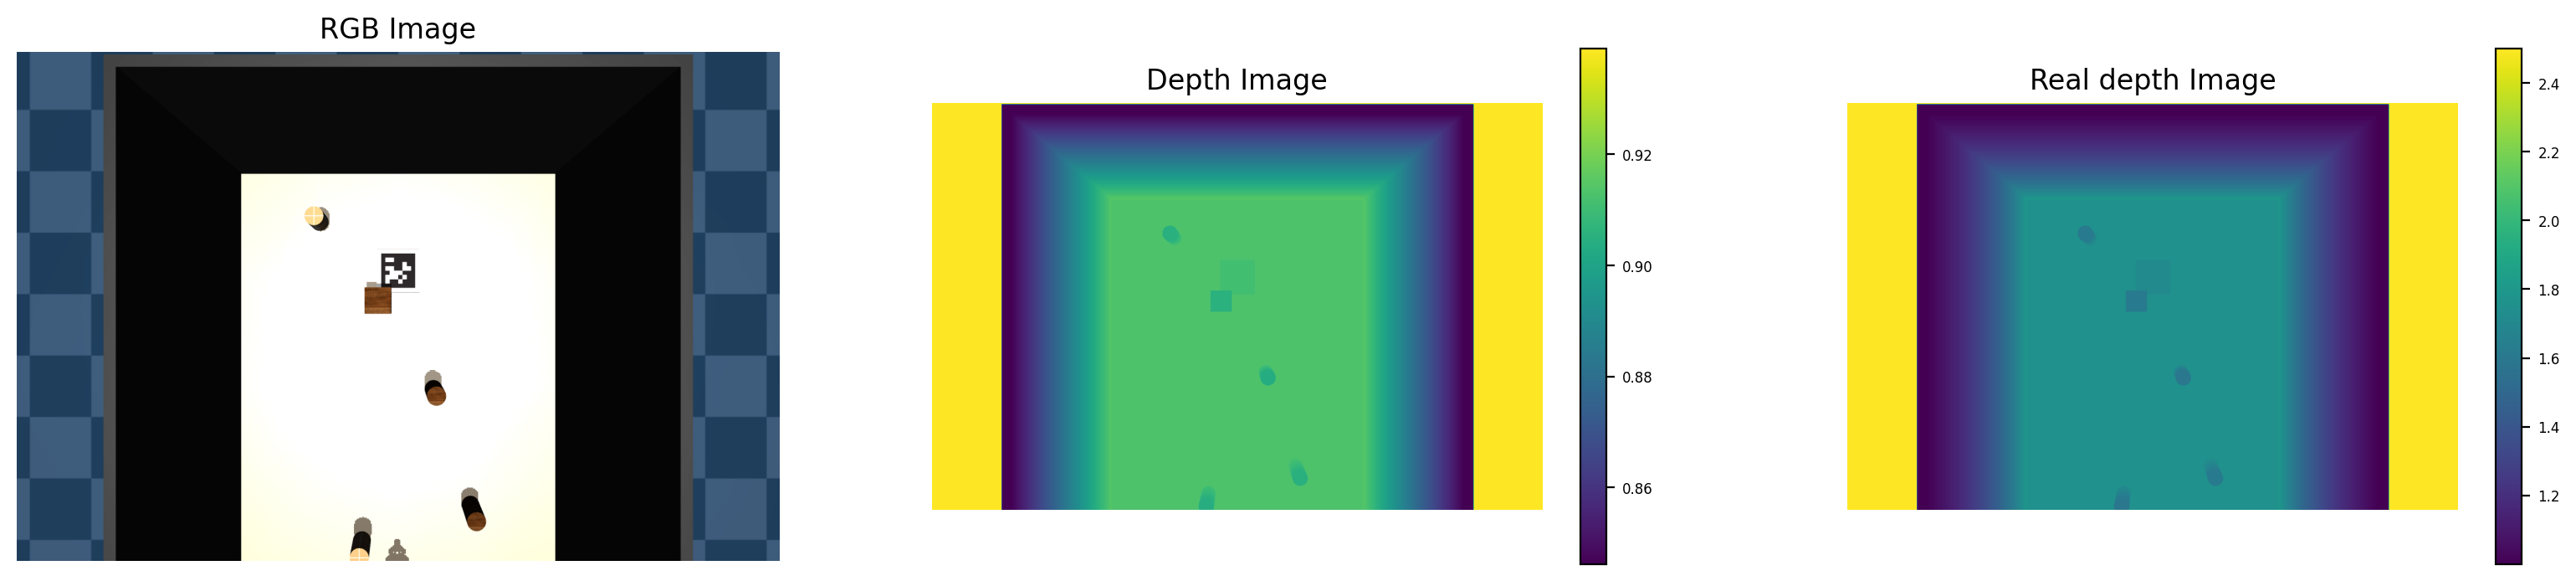

In [4]:
import math

# Get camera information
cam_infos = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 0.0,
                    cam_elevation = -90.0,
                    cam_lookat    = [1.2,0.0,2.5])

# Set AprilTag configurations
april_addr_z = env.sim.model.get_joint_qpos_addr('box_checker_z')
env.sim.data.qpos[april_addr_z] = -math.pi/2

# Check available objects whose names start with 'obj_'
obj_names = get_env_obj_names(env,prefix='obj_') # see objects
for obj_idx,obj_name in enumerate(obj_names):
    print ("[%d/%d] obj_name:[%s]"%(obj_idx,len(obj_names),obj_name))

# Randomly initialize position of objects.
random_spawn_objects(env, prefix='obj_')

# Set Joint Configurations
init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]
set_env_joint_configuration(env, init_configurations, prefix='ur_')

# update object, robot configurations
env.forward(INCREASE_TICK=False)

width = 1500
height = 1000
ur_joint_idx = np.array([0, 1, 2, 3, 4, 5, 6], dtype=np.int32)


for _ in range(2):
    img = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=False, camera_name="track")
    img_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=True, camera_name="track")
    img_real = np.array(env.depth_2_meters(img_depth))

plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
plt.imshow(img); plt.axis('off')
plt.title("RGB Image")
# plt.show()

plt.subplot(1, 3, 2)
plt.imshow(img_depth); plt.axis('off')
plt.title("Depth Image")
plt.colorbar()
# plt.show()

plt.subplot(1, 3, 3)
plt.imshow(img_real); plt.axis('off')
plt.title("Real depth Image")
plt.colorbar()
plt.show()

##### get Rotational, Translational informations of wrist

In [ ]:
wrist2_rot = env.sim.data.get_body_xmat("ur_wrist_2_link")
print(wrist2_rot)  # represented in R

wrist3_rot = env.sim.data.get_body_xmat("ur_wrist_3_link")
print(wrist3_rot)  # represented in R

wrist2_pos = env.sim.data.get_body_xpos("ur_wrist_2_link")
print(wrist2_pos)

wrist3_pos = env.sim.data.get_body_xpos("ur_wrist_3_link")
print(wrist3_pos)

wrist2_rot_rpy = np.degrees(r2rpy(wrist2_rot))
print(wrist2_rot_rpy)

wrist3_rot_rpy = np.degrees(r2rpy(wrist3_rot))
print(wrist3_rot_rpy)

[[ 7.07e-01  7.07e-01 -5.55e-17]
 [ 1.67e-16 -9.71e-17  1.00e+00]
 [ 7.07e-01 -7.07e-01 -2.36e-16]]
[[ 2.78e-17  7.07e-01 -7.07e-01]
 [ 1.00e+00 -1.39e-16  0.00e+00]
 [-1.67e-16 -7.07e-01 -7.07e-01]]
[ 0.29 -0.09  1.18]
[0.29 0.   1.18]
[-9.00e+01 -4.50e+01  1.35e-14]
[-1.35e+02  9.54e-15  9.00e+01]


In [ ]:
wrist_2_name = env.model.body_name2id("ur_wrist_3_link")
env.model.body_pos[wrist_2_name]

array([0.  , 0.  , 0.09])

In [ ]:
# Get camera information
cam_infos = env.set_cam_infos(cam_distance  = 0.,
                    cam_azimuth   = wrist3_rot_rpy[2]+90,  # Z-axis: Yaw
                    cam_elevation = wrist3_rot_rpy[0],  # X-axis: Roll
                    cam_lookat    = wrist3_pos) 
cam_infos["cam_lookat"][2] += 0.15

cam_infos

{'cam_distance': 0.0,
 'cam_azimuth': 180.0,
 'cam_elevation': -135.0,
 'cam_lookat': array([0.29, 0.  , 1.33])}

# Get `AX=XB` matrix data

In [18]:
import apriltag

max_tick = 10
env.tick=0

while env.tick < max_tick:
    # Update
    env.step()

    # Set Joint Configurations
    init_configurations = [-math.pi, -3*math.pi/4, -0.5, -1.2, math.pi/2, 0]
    set_env_joint_configuration(env, init_configurations, prefix='ur_')

    # Get wrist pose.
    wrist3_rot = env.sim.data.get_body_xmat("ur_wrist_3_link")
    wrist3_pos = env.sim.data.get_body_xpos("ur_wrist_3_link")
    wrist3_rot_rpy = np.degrees(r2rpy(wrist3_rot))

    # Follow Robot wrist #3.
    cam_infos = env.set_cam_infos(cam_distance  = 0.,
                        cam_azimuth   = wrist3_rot_rpy[2]+90,  # Z-axis: Yaw
                        cam_elevation = wrist3_rot_rpy[0],  # X-axis: Roll
                        cam_lookat    = wrist3_pos) 

    print(cam_infos)
    cam_infos["cam_lookat"][2] += 0.20
    print(cam_infos)

    # update object, robot configurations
    env.forward(INCREASE_TICK=False)

    for _ in range(2):
        img = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=False, camera_name="track")
        # img = cv2.flip(cv2.rotate(img,cv2.ROTATE_180),1) # 0:up<->down, 1:left<->right
        img_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=True, camera_name="track")
        # img_depth = cv2.flip(cv2.rotate(img_depth,cv2.ROTATE_180),1) # 0:up<->down, 1:left<->right
        img_real = np.array(env.depth_2_meters(img_depth))

    detector = apriltag.Detector()
    img_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_Gray = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

    # detections, dimg = detector.detect(fram_gray, return_image=True)
    results = detector.detect(img_Gray)

    # cam_matrix, _, _ = env.camera_matrix_and_pose(width=env.render_width, height=env.render_height, camera_name="main1")
    cam_matrix, _, _ = env.camera_matrix_and_pose(width=env.render_height, height=env.render_width, camera_name="main1")

    fx = cam_matrix[0][0]
    cx = cam_matrix[0][2]
    fy = cam_matrix[1][1]
    cy = cam_matrix[1][2]

    cam_params = [fx, fy, cx, cy]

    # Render the detections on the image
    if len(results) > 0:
        draw_bbox(results, img, verbose=False)

        for r in results:
            pose, e0, e1 = detector.detection_pose(detection=r, camera_params=cam_params, tag_size=0.06)    # should check tag_size
            
            poseRotation = pose[:3, :3]
            poseTranslation = pose[:3, 3]

        plt.imshow(img) # ; plt.axis('off')
        plt.show()

    # plt.figure(figsize=(20,4))
    # plt.subplot(1, 3, 1)
    # plt.imshow(img); plt.axis('off')
    # plt.title("RGB Image")
    # # plt.show()

    # plt.subplot(1, 3, 2)
    # plt.imshow(img_depth); plt.axis('off')
    # plt.title("Depth Image")
    # plt.colorbar()
    # # plt.show()

    # plt.subplot(1, 3, 3)
    # plt.imshow(img_real); plt.axis('off')
    # plt.title("Real depth Image")
    # plt.colorbar()
    # plt.show()



{'cam_distance': 0.0, 'cam_azimuth': -1.4210854715202004e-14, 'cam_elevation': -52.402825172239936, 'cam_lookat': array([ 0.93, -0.11,  1.35])}
{'cam_distance': 0.0, 'cam_azimuth': -1.4210854715202004e-14, 'cam_elevation': -52.402825172239936, 'cam_lookat': array([ 0.93, -0.11,  1.55])}


NameError: name 'draw_bbox' is not defined